Principal Component Analysis (PCA)

The principal components of a dataset are the "directions" in a dataset which hold the most variation.
In simplified terms, the first principal component of a dataset is the direction along the dataset with the highest variation.

It's also being used when we want to decrease the size of our dataset to make life easier for the algorithms or to simply visualize the data by making it 2 or 3 dimensional.


(In short you'll just use this to visualize multivariate into 2dimensional plot. Or classifying dataset unsupervised!)

In [4]:
import numpy as np
import pandas as pd
from ipywidgets import interact,interactive,fixed,interact_manual
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
style.use('fivethirtyeight')


def f(x,y):
    
    data = np.array([[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]])
    data[0] = data[0]-np.mean(data[0])
    data[1] = data[1]-np.mean(data[1])
 
    # Create Axes

    fig = plt.figure(figsize=(10,10))
    ax0 = fig.add_subplot(121)
    ax0.set_aspect('equal')
    ax0.set_ylim(-2,2)
    ax0.set_xlim(-2,2)
    ax0.set_title('Search for Principal component',fontsize=14)
    ax0.set_xlabel('PC x value',fontsize=10)
    ax0.set_ylabel('PC y value',fontsize=10)
    



    #vec = np.array([0.6778734,0.73517866])
    vec = np.array([x,y])

    ax0.scatter(data[0],data[1])
    ax0.plot(np.linspace(min(data[0]),max(data[0])),(vec[1]/vec[0])*np.linspace(min(data[0]),max(data[0])),linewidth=1.5,color="black",linestyle="--")



    b_on_vec_list = [[],[]]
    for i in range(len(data[0])):
        a = vec
        b = np.array([data[0][i],data[1][i]])
        b_on_a = (np.dot(a,b)/np.dot(a,a))*a
        b_on_vec_list[0].append(b_on_a[0])
        b_on_vec_list[1].append(b_on_a[1])
        ax0.scatter(b_on_a[0],b_on_a[1],color='red')
        ax0.plot([b_on_a[0],b[0]],[b_on_a[1],b[1]],"r--",linewidth=1)


    ax1 = fig.add_subplot(122,projection='3d')
    ax1.set_aspect('equal')
    ax1.set_ylim(0,1)
    ax1.set_xlim(0,1)
    ax1.set_title('Varicane with respect to the 1. PC',fontsize=14)
    ax1.set_xlabel('PC x value',fontsize=10)
    ax1.set_ylabel('PC y value',fontsize=10)
    ax1.set_zlabel('variance',fontsize=10)

    

    # Transform data
    e_vec = (1/np.sqrt(np.dot(vec,vec.T)))*vec
    data_trans = np.dot(data.T,e_vec)
    
    # Plot the data
    ax0.scatter(data_trans,np.zeros_like(data_trans),c='None',edgecolor='black')
    # Plot the twisted line
    ax0.plot(np.linspace(min(data_trans),max(data_trans),10),np.zeros_like(data_trans),linestyle='--',color='grey',linewidth=1.5)
    # Plot the circles
    for i in range(len(data_trans)):
        ax0.add_artist(plt.Circle((0,0),data_trans[i],linewidth=0.5,linestyle='dashed',color='grey',fill=False))

    # Calculate the variance    
    ax0.text(0,-1.4,'variance= {0}'.format(str(np.round(np.var(data_trans),3))),fontsize=20)


    # Plot the variance with respect to the principal component vector

    # Initialize the meshgrid
    cross_x,cross_y =np.meshgrid(np.linspace(0.001,1,num=20),np.linspace(0.001,1,num=20))
    # Create the iterators in the format [(0.01,0.01),(0.01,0.0620),(0.01,0.114),...(0.0620,0.01),(0.0620,0.0620),(0.0620,0.1141),...(0.999,0.01),(0.999,0.0620),...(0.999,0.999)]
    x_y_pairs = []
    for i in range(len(cross_y)):
        x_y_pairs.append(list(zip(cross_x[i],cross_y[i])))
    flatten_x_y_pairs = [np.array(list(x_y)) for sublist in x_y_pairs for x_y in sublist]


    variances = []
    for i in flatten_x_y_pairs:
        e_vec = (1/np.sqrt(np.dot(i,i.T)))*i
        data_trans = np.dot(data.T,e_vec.T)
        variances.append(np.var(data_trans))

    
        
    index_of_max_variance = np.where(variances == max(variances))[0][0]
    # PLot the variance surface
    ax1.scatter(cross_x,cross_y,np.array(variances).reshape(20,20),alpha=0.8)


    # Mark the point with the highest variance
    vec_point = np.array([x,y])
    e_vec_point = (1/np.sqrt(np.dot(vec_point,vec_point.T)))*vec_point
    data_trans_point = np.dot(data.T,e_vec_point.T)
    ax1.scatter(x,y,np.var(data_trans_point)+0.01,color="orange",s=100)
    
    
    
    

    plt.show()
    
    
interact(f,x=(0.001,1,0.001),y=(0.001,1,0.001))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, min=0.001, step=0.001), FloatSlider(val…

<function __main__.f(x, y)>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from ipywidgets.widgets import interact
style.use('fivethirtyeight')
import numpy as np
import matplotlib.patches as patches

def f(lamb):

    # Unit vectors
    e_x = np.array([1,0])
    e_y = np.array([0,1])


    # Area spanned by the unit vectors
    print(np.cross(e_x,e_y)) # Area spanned by the unit vectors == 1


    # Any 2D matrix A of the shape (A-lambda*I)
    A = np.array([[2-lamb,3],[3,0.5-lamb]])



    # Transform the unit vectors by the matrix A --> Unsurprisingly this is exactly the matrix A but otherwise the notation
    # of "the determinant describes the change of the area spanned by the unit vectors after trasnformation" makes no sense 

    # Plot the vectors
    fig = plt.figure(figsize=(10,10))
    ax0 = fig.add_subplot(111)
    ax0.set_xlim(-5,8)
    ax0.set_ylim(-5,8)
    ax0.set_aspect('equal')

    # Vector of matrix A
    ax0.arrow(0,0,A[0][0],A[0][1],color="red",linewidth=1,head_width=0.05) #First vector 
    ax0.arrow(0,0,A[1][0],A[1][1],color="blue",linewidth=1,head_width=0.05) # Second vector



    # Area spanned by the vectors**
    ax0.arrow(A[0][0],A[0][1],A[1][0],A[1][1],color="blue",linestyle='dashed',alpha=0.3,linewidth=1,head_width=0.05)
    ax0.arrow(A[1][0],A[1][1],A[0][0],A[0][1],color="red",linestyle='dashed',alpha=0.3,linewidth=1,head_width=0.05)
    ax0.add_patch(patches.Polygon(xy=[[0,0],[A[0][0],A[0][1]],[A[0][0]+A[1][0],A[0][1]+A[1][1]],[A[1][0],A[1][1]]],fill=True,alpha=0.1,color='yellow'))
    
    # Add text which shows the calculation of the determinant and the area
    ax0.text(3,-0,s=r'$determinant = a_{11}*a_{22}-a_{21}*a_{12}$'+'= {0}'.format(np.round(A[0][0]*A[1][1]-A[1][0]*A[0][1],3)))
    #ax0.text(3,-1,s='area = {0}'.format(np.round(np.cross(A.T[0],A.T[1]),3)))
    ax0.text(3,-0.5,s=r'$determinant$'+'= {0}*{1}-{2}*{3} = {4}'.format(A[0][0],A[1][1],A[1][0],A[0][1],np.round(A[0][0]*A[1][1]-A[1][0]*A[0][1],3)))
    ax0.text(3,-4,s='**Mind that in this case the value of the determinant \n and the area(cross product --> Yellow shaded) are the same \n since the area spanned by the unit vectors is 1',fontsize=8)
    
    
    # Plot the eigenvectors
    ax0.arrow(0,0,0.61505,-0.788491,color="black",linestyle='dashed',alpha=0.3,linewidth=1,head_width=0.05)
    ax0.arrow(0,0,0.78771,0.6159,color="black",linestyle='dashed',alpha=0.3,linewidth=1,head_width=0.05)
    
    # Caclulate (A-lambda I)*nu for different values of lambda using the found eigenvectors. The result must be
    # 0 when nu is perpendicular to (A-lambda I)
    # Mind that for the calculation of v1 and v2 we have to solve the linear system of equations (A-lambda I)*v=0
    # for v1 and v2   
    
    v1 = -3*(((-1+0.5*lamb)/(-9-2*lamb+lamb**2)))/(2-lamb)
    v2 = (-1+0.5*lamb)/(-9-2*lamb+lamb**2)
    v = np.array((1/np.sqrt(v1**2+v2**2))*np.array([v1,v2]))
    ax0.text(3,-1,s=r'$(A-$'+'{0}'.format(lamb)+r'$I)*\nu$'+'= {0}'.format(np.round(np.dot(A,v),3)))
    ax0.arrow(0,0,-v[0]*0.5,-v[1]*0.5,color="green",alpha=0.8,linewidth=1,head_width=0.05) # We draw the eigenvector for lambda
                                                                                        # Mind v[0]*0.5 and v[1]*0.5 --> The *0.5
                                                                                        # is solely done for visualization purposes
    
   
    
    
    
    
    plt.show()
    
interact(f,lamb=(-5,5,0.001))

interactive(children=(FloatSlider(value=0.0, description='lamb', max=5.0, min=-5.0, step=0.001), Output()), _d…

<function __main__.f(lamb)>

In [3]:
#Using Sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact,interactive,fixed,interact_manual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use("fivethirtyeight")
from sklearn.datasets import load_iris                                  #using iris cuz why fucking not?


#preparing dataset
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(len(df.columns), "target", iris.target.reshape(-1))
target=df.iloc[:,-1].values

#scaledata
scale=StandardScaler()
data=scale.fit_transform(df.iloc[:,:-1].values)

#train test split
train_data, test_data, train_target, test_target=train_test_split(data, target, train_size=0.8, random_state=31212)

model=PCA(n_components=2, random_state=42131)
model.fit(train_data)
train_data=model.transform(train_data)
test_data=model.transform(test_data)

def asu(data):    
    fig, ax =plt.subplots(figsize=(10,10))
    colors=["red", "blue", "green"]
    if data=="train_data":
        for i in range(len(iris.target_names)):
            ax.set_title("train")
            ax.scatter(train_data[train_target==i,0], train_data[train_target==i,1],color=colors[i], alpha=0.8, label=str(iris.target_names[i]))
    elif data=="test_data":
        for i in range(len(iris.target_names)):
            ax.set_title("test")
            ax.scatter(test_data[test_target==i,0], test_data[test_target==i,1],color=colors[i], alpha=0.8, label=str(iris.target_names[i]))
    else:
        mergeddata=np.concatenate((train_data, test_data), axis=0)
        mergedtarget=np.concatenate((train_target, test_target), axis=0)
        for i in range(len(iris.target_names)):
            ax.set_title("merged")
            ax.scatter(mergeddata[mergedtarget==i,0], mergeddata[mergedtarget==i, 1], color=colors[i], alpha=0.8, label=str(iris.target_names[i]))
    ax.legend(loc=("upper right"))

interact(asu, data=["train_data", "test_data", "merged"])

interactive(children=(Dropdown(description='data', options=('train_data', 'test_data', 'merged'), value='train…

<function __main__.asu(data)>

#testing shit, cuz why fucking not? LOL! (MLPCLASSIFIER)

In [4]:
#libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from matplotlib import style
from sklearn.metrics import accuracy_score
from ipywidgets.widgets import interact
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle
style.use("fivethirtyeight")

In [7]:
#dataset
df=pd.read_excel("files/DryBeanDataset/Dry_Bean_Dataset.xlsx")
data=df.iloc[:,:-1]
target=df.iloc[:,-1]
    #no categorical on X

#scale
scaler=StandardScaler()
scaler.fit(data)
data=scaler.transform(data)

#train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.8, random_state=64535)

#we dump here cuz shit load so long
with open("files/DryBeanDataset/data.pkl", mode="bw") as asu:
    data=(train_data, test_data, train_target, test_target, scaler)
    pickle.dump(data, asu)

In [5]:
#load the data set just in case!
with open("files/DryBeanDataset/data.pkl", mode="br") as asu:
    data=pickle.load(asu)

train_data=data[0]
test_data=data[1]
train_target=data[2]
test_target=data[3]
scaler=data[4]

In [10]:
#bruteforcing 
for i in ['relu', 'identity', 'logistic', 'tanh']:
    model=MLPClassifier([100,50,], alpha=1e-5, random_state=24312, tol=1e-5, max_iter=10000, activation=i)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    print(accuracy_score(predicted, test_target))

0.9335291957399926
0.9221446933529196
0.9346309217774513
0.9092912229159016


In [6]:
data=np.concatenate((train_data,test_data), axis=0)
target=np.concatenate((train_target,test_target), axis=0)

model=MLPClassifier([100,50,], alpha=1e-5, random_state=24312, tol=1e-5, max_iter=10000, activation="relu")
model.fit(data, target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=[100, 50], max_iter=10000,
              random_state=24312, tol=1e-05)

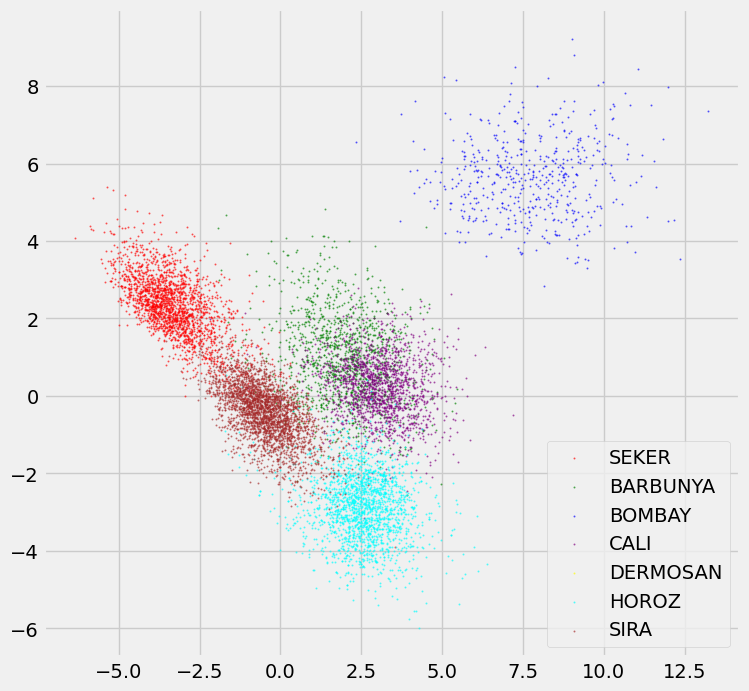

In [7]:
classes= ["SEKER", "BARBUNYA", "BOMBAY", "CALI", "DERMOSAN", "HOROZ", "SIRA"]
colours=["red", "green", "blue", "purple", "yellow", "cyan", "brown"]

PCAmodel=PCA(n_components=2, random_state=34732)
PCAmodel.fit(data)
PCAdata=PCAmodel.transform(data)

fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(classes)):
    ax.scatter(PCAdata[target==classes[i],0], PCAdata[target==classes[i],1], alpha=0.5, color=colours[i], label=classes[i], s=0.9)
ax.legend(loc="lower right")

C:\Users\Rhey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[-0.57556437 -0.71184973 -0.7228328  -0.51688378 -0.57159383 -0.32941727
  -0.57574739 -0.64996177 -0.81371393  0.09319057  0.79151581  0.50688726
   0.5095501   0.64669086  0.4769115   0.28452739]]
['DERMASON']
[[-2.07369255 -0.24507445]]


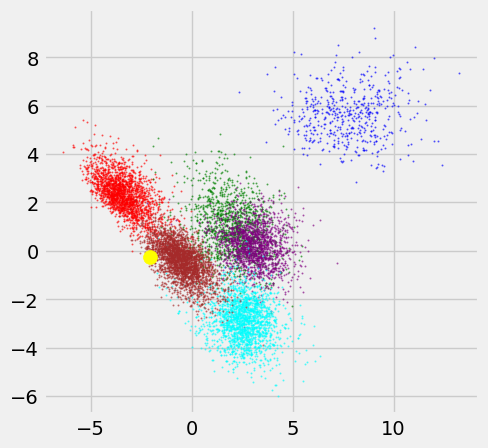

In [33]:
#trynna predict and point out where it's gonna be located!
def trynnapredict(urdata, visualize):
    urdata=scaler.transform(urdata)
    print(urdata)
    predictdata=model.predict(urdata)
    print(predictdata)
    pcapredicted=PCAmodel.transform(urdata)
    print(pcapredicted)
    if visualize:
        fig, ax =plt.subplots(figsize=(5,5))
        for i in range(len(classes)):
            ax.scatter(PCAdata[target==classes[i],0], PCAdata[target==classes[i],1], alpha=0.5, color=colours[i], label=classes[i], s=0.9)
        ax.scatter(pcapredicted[0:,0], pcapredicted[0,1], label="predicted", color="yellow", s=100)
        plt.show()


dummydata=[[36171, 702.747, 258.2015741, 179.0272574, 1.442247275, 0.720589073, 36626, 214.6027669, 0.709791994, 0.987577131, 0.920391033, 0.831144301, 0.007138359, 0.00210128, 0.69080085, 0.996305643]]
trynnapredict(dummydata, visualize=True)

In [ ]:
from category_encoders import 